let's draw the 2 principal graph

how much variance is retained

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA 
from sklearn.preprocessing import StandardScaler
import datetime as dt
import seaborn as sns

In [2]:
df=pd.read_csv('fx_expanded_majors.csv', delimiter=';')

In [3]:
df['Date']=pd.to_datetime(df['Date'],dayfirst=True)

df=df.set_index('Date')

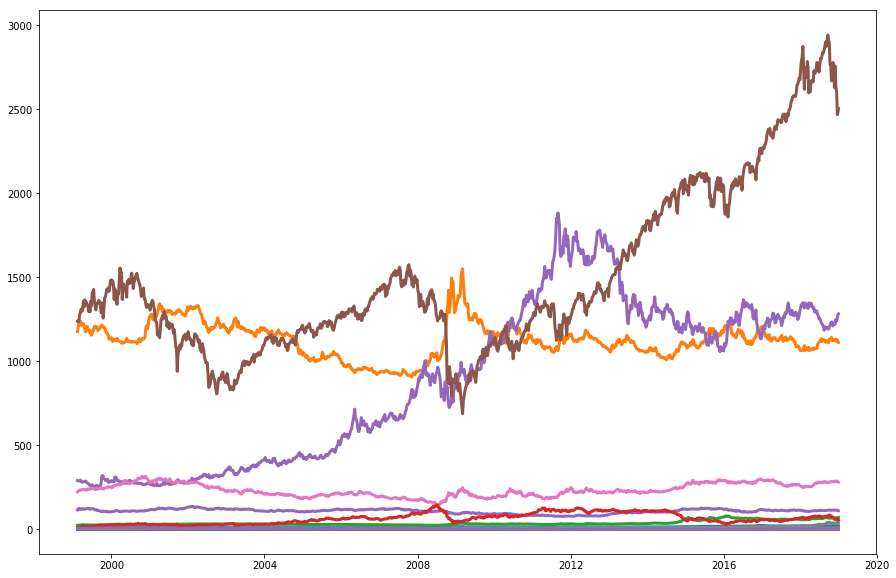

In [4]:
plt.figure(figsize=(15,10.))
for c in df.loc[:,df.columns!='USDIDR'].columns.values:
    plt.plot(df.index, df[c], lw=3)


Moving window generation

In [11]:
def rolling_pca(window_data):
    transf=StandardScaler().fit_transform(window_data)
    pca = PCA(n_components=2)
    pca.fit(transf)
    return pca.components_[0], pca.components_[1], pca.explained_variance_ratio_[0], pca.explained_variance_ratio_[1]

#calculates 1st and 2nd principal components for the given data 

In [6]:
X_std=StandardScaler().fit_transform(df)
# before using PCA, scaling required

X_std_1=pd.DataFrame(X_std,index=df.index,columns=df.columns.tolist())
# create DataFrame out of scaled data

C:\Users\MO_Reuters_2\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\preprocessing\data.py:625: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\MO_Reuters_2\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\base.py:462: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


In [8]:
curr=X_std_1.drop(['OIL','US10YR','SPX'],axis=1)
#choose only currencies

In [10]:
curr[curr.index.year==2018].head(5)

,EURUSD,GBPUSD,AUDUSD,USDCAD,USDJPY,USDNZD,USDCHF,USDSEK,USDNOK,USDZAR,...,XAUUSD,USDCNY,USDHUF,USDARS,USDPLN,USDHKD,USDTRY,USDIDR,USDMYR,USDRUB
Date,,,,,,,,,,,,,,,,,,,,,
2018-12-31,-0.358826,-1.683342,-0.487958,0.673313,0.214173,-0.208906,-0.744592,0.878857,1.374443,1.978984,...,0.845077,-0.463214,1.257998,4.676641,0.511303,2.118702,3.332525,2.123721,1.366021,2.403744
2018-12-28,-0.372450,-1.711531,-0.489289,0.673844,0.257439,-0.199614,-0.734879,1.002849,1.431890,2.011194,...,0.841305,-0.430233,1.285235,4.724040,0.552923,2.066604,3.316874,2.215544,1.422208,2.417952
2018-12-21,-0.415098,-1.739208,-0.493945,0.654726,0.328305,-0.201937,-0.699134,1.043688,1.480401,2.089444,...,0.790936,-0.428937,1.337574,4.749908,0.578608,2.122710,3.357315,2.207806,1.490729,2.374721
2018-12-14,-0.454193,-1.770984,-0.406140,0.538953,0.490179,-0.257984,-0.682815,1.059067,1.353251,1.998109,...,0.752964,-0.468161,1.422757,4.634602,0.623978,1.393329,3.403200,2.222250,1.510463,2.223277
2018-12-07,-0.410952,-1.697693,-0.382193,0.506027,0.437962,-0.298930,-0.706127,1.046642,1.259208,1.910986,...,0.774768,-0.366627,1.368817,4.688609,0.574108,1.481496,3.345649,2.170149,1.457839,2.193275


In [12]:
rolling_pca(curr[curr.index.year==2018])

(array([ 0.22344232,  0.221893  ,  0.21954054, -0.18164821, -0.18118294,
        -0.21643853, -0.17250749, -0.21783176, -0.20883245, -0.22103658,
        -0.13106163, -0.20970012, -0.22642024, -0.20838938,  0.20949113,
        -0.20291965, -0.22518202, -0.21295409, -0.22248725, -0.01613833,
        -0.20795775, -0.21088507, -0.22056884, -0.21725309]),
 array([ 0.01049116, -0.04428596,  0.08293282, -0.16846426,  0.278882  ,
        -0.0778862 , -0.23553149, -0.20384864,  0.08142654,  0.04880471,
         0.06007276,  0.05082345,  0.03172847, -0.15059806, -0.00882924,
         0.28414408, -0.05288894,  0.17503266, -0.07727467, -0.76143022,
        -0.01413533, -0.03770735,  0.18976089, -0.07267566]),
 0.7884565451590276,
 0.06730599385858425)

In [13]:
pc1=[]
pc2=[]
weights1=[]
weights2=[]
explained_v1=[]
explained_v2=[]

for i in curr.index.year.unique():
    data=rolling_pca(curr[curr.index.year==i])
    pc1.append(data[0])
    pc2.append(data[1])
    
    weights1.append(np.square(data[0]))
    weights2.append(np.square(data[1]))

    explained_v1.append(data[2])
    explained_v2.append(data[3])
    
    
# Find 1st and 2nd principal components for every year from 1999-2018
# By squaring find the weights??? 

In [43]:
w1=pd.DataFrame(weights1,index=curr.index.year.unique(),columns=curr.columns.tolist())
w2=pd.DataFrame(weights2,index=curr.index.year.unique(),columns=curr.columns.tolist())
# create DataFrames from weights of each currency by year

w1_tr=w1.transpose()
w2_tr=w2.transpose()

explained=pd.DataFrame(np.column_stack([explained_v1,explained_v2]),index=curr.index.year.unique(),
                  columns=['First Component','Second Component'])
# explained variance ratios by first and second components as function of year

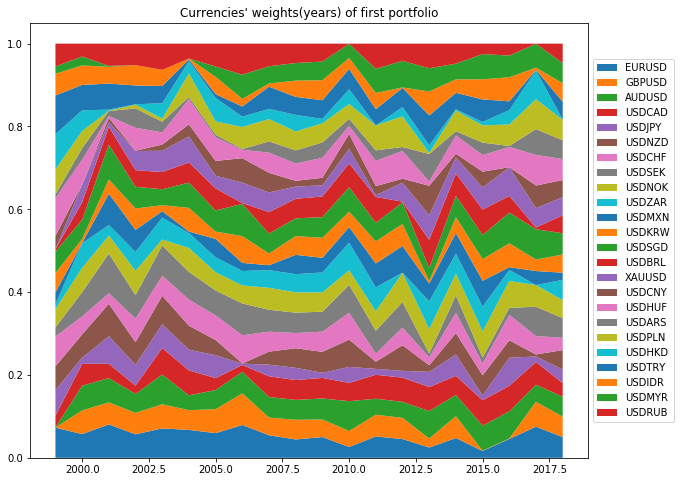

In [87]:
fig, ax = plt.subplots(figsize=(10,8))
ax.stackplot(X_std_1.index.year.unique(), w1_tr)
ax.set_title('Currencies\' weights(years) of first portfolio')
plt.legend(w1_tr.index,loc='center left',bbox_to_anchor=(1,0.5))
plt.show()

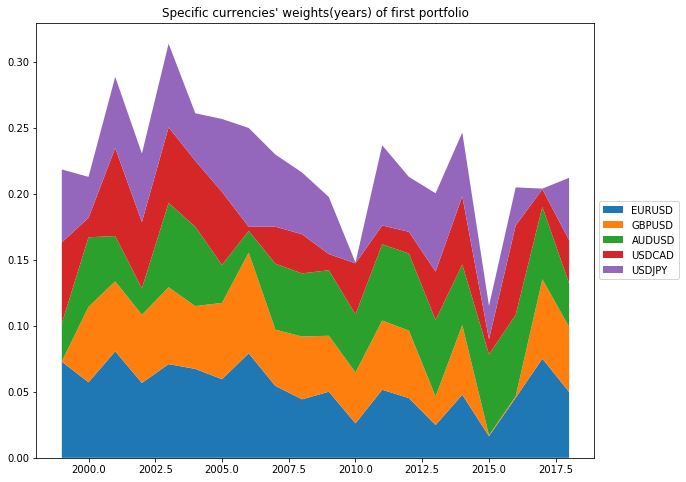

In [86]:
# Specific currencies selected of w1
fig, ax = plt.subplots(figsize=(10,8))
ax.stackplot(X_std_1.index.year.unique(), w1_tr.loc[['EURUSD','GBPUSD','USDCAD','USDJPY','USDRUB']])
ax.set_title('Specific currencies\' weights(years) of first portfolio')
plt.legend(w1_tr.index,loc='center left',bbox_to_anchor=(1,0.5))
plt.show()

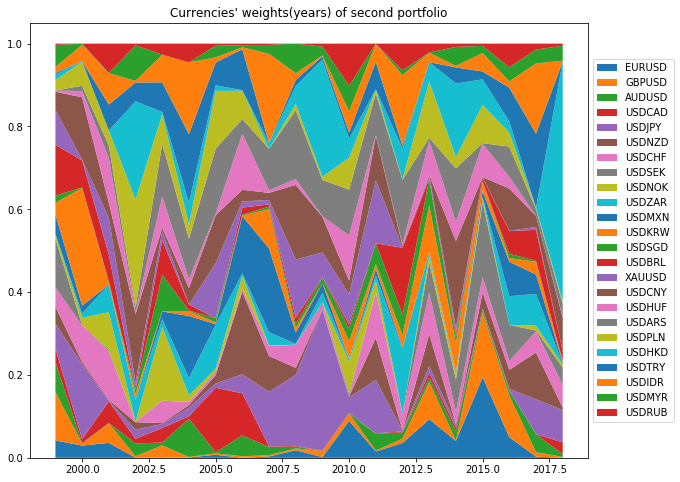

In [88]:
fig, ax = plt.subplots(figsize=(10,8))
ax.stackplot(X_std_1.index.year.unique(), w2_tr)
ax.set_title('Currencies\' weights(years) of second portfolio')
plt.legend(w2_tr.index,loc='center left',bbox_to_anchor=(1,0.5))
plt.show()

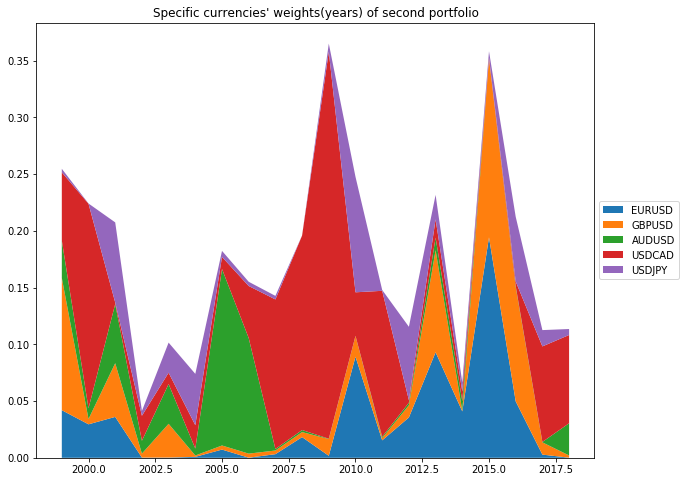

In [89]:
# Specific currencies selected of w2
fig, ax = plt.subplots(figsize=(10,8))
ax.stackplot(X_std_1.index.year.unique(), w2_tr.loc[['EURUSD','GBPUSD','USDCAD','USDJPY','USDRUB']])
ax.set_title('Specific currencies\' weights(years) of second portfolio')
plt.legend(w2_tr.index,loc='center left',bbox_to_anchor=(1,0.5))
plt.show()

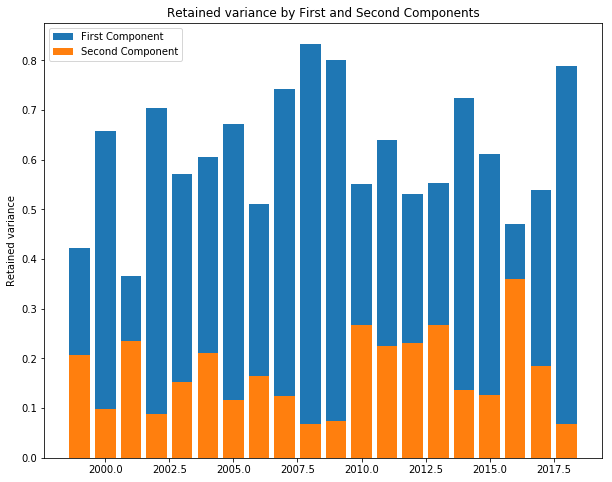

In [59]:
fig = plt.figure(figsize=(10,8))
ax = fig.add_subplot(111)

first=ax.bar(explained.index,explained.loc[:,'First Component'])
second=ax.bar(explained.index,explained.loc[:,'Second Component'])

ax.set_ylabel('Retained variance')
ax.set_title('Retained variance by First and Second Components')
ax.legend( (first[0], second[0]), ('First Component', 'Second Component') ,loc='upper left')

Let's do the factor analysis

In [93]:
factor_1=pd.DataFrame(index=df.index,columns=['factor_1'])

In [95]:
w1_tr.head(5)

Date,2018,2017,2016,2015,2014,2013,2012,2011,2010,2009,2008,2007,2006,2005,2004,2003,2002,2001,2000,1999
EURUSD,0.049926,0.075127,0.045487,0.016360,0.047797,0.024821,0.045240,0.051569,0.026099,0.050090,0.044295,0.054435,0.079220,0.059558,0.067356,0.071000,0.056739,0.080700,0.057211,0.072868
GBPUSD,0.049237,0.060150,0.001188,0.000690,0.052811,0.021603,0.051156,0.052441,0.038582,0.042425,0.047570,0.042685,0.076271,0.057785,0.047623,0.058212,0.051695,0.053023,0.057177,0.000179
AUDUSD,0.048198,0.041152,0.065417,0.060606,0.051305,0.066385,0.038806,0.038569,0.072084,0.050750,0.047971,0.049682,0.052265,0.046207,0.035820,0.071891,0.045812,0.058787,0.059632,0.000151
USDCAD,0.032996,0.054900,0.061662,0.061346,0.045888,0.058022,0.058396,0.057816,0.044012,0.049636,0.047865,0.049973,0.016402,0.028837,0.060142,0.063918,0.019966,0.034346,0.052720,0.028732
USDJPY,0.032827,0.013303,0.067742,0.011458,0.051697,0.036645,0.016437,0.014236,0.038689,0.012241,0.029638,0.028043,0.003135,0.055322,0.049949,0.057337,0.050224,0.066726,0.014763,0.061453


In [98]:
curr.head(5)

,EURUSD,GBPUSD,AUDUSD,USDCAD,USDJPY,USDNZD,USDCHF,USDSEK,USDNOK,USDZAR,...,XAUUSD,USDCNY,USDHUF,USDARS,USDPLN,USDHKD,USDTRY,USDIDR,USDMYR,USDRUB
Date,,,,,,,,,,,,,,,,,,,,,
2018-12-31,-0.358826,-1.683342,-0.487958,0.673313,0.214173,-0.208906,-0.744592,0.878857,1.374443,1.978984,...,0.845077,-0.463214,1.257998,4.676641,0.511303,2.118702,3.332525,2.123721,1.366021,2.403744
2018-12-28,-0.372450,-1.711531,-0.489289,0.673844,0.257439,-0.199614,-0.734879,1.002849,1.431890,2.011194,...,0.841305,-0.430233,1.285235,4.724040,0.552923,2.066604,3.316874,2.215544,1.422208,2.417952
2018-12-21,-0.415098,-1.739208,-0.493945,0.654726,0.328305,-0.201937,-0.699134,1.043688,1.480401,2.089444,...,0.790936,-0.428937,1.337574,4.749908,0.578608,2.122710,3.357315,2.207806,1.490729,2.374721
2018-12-14,-0.454193,-1.770984,-0.406140,0.538953,0.490179,-0.257984,-0.682815,1.059067,1.353251,1.998109,...,0.752964,-0.468161,1.422757,4.634602,0.623978,1.393329,3.403200,2.222250,1.510463,2.223277
2018-12-07,-0.410952,-1.697693,-0.382193,0.506027,0.437962,-0.298930,-0.706127,1.046642,1.259208,1.910986,...,0.774768,-0.366627,1.368817,4.688609,0.574108,1.481496,3.345649,2.170149,1.457839,2.193275


In [99]:
for i in factor_1.index.year.unique():
    factor_1.loc[factor_1.index.year==i]=curr[curr.index.year==i].dot(w1_tr[[i]])
# find first factor change within time through scalar multiplication of X_std_1 and weights

In [100]:
factor_1.head(5)

,factor_1
Date,
2018-12-31,0.898996
2018-12-28,0.92528
2018-12-21,0.94573
2018-12-14,0.937397
2018-12-07,0.916925


In [101]:
X_std_2=X_std_1
X_std_2=X_std_2.join(factor_1)
X_std_2=X_std_2[['EURUSD', 'GBPUSD', 'OIL','US10YR','SPX','factor_1']]

**Continue here**

**Where is correlation of factor_1???
<br> Add factor 2
<br> Plot intuitively**

In [107]:
X_std_2.corr()

,EURUSD,GBPUSD,OIL,US10YR,SPX
EURUSD,1.000000,0.548419,0.782431,-0.377589,-0.077474
GBPUSD,0.548419,1.000000,0.225087,0.355716,-0.471216
OIL,0.782431,0.225087,1.000000,-0.546158,0.163462
US10YR,-0.377589,0.355716,-0.546158,1.000000,-0.456090
SPX,-0.077474,-0.471216,0.163462,-0.456090,1.000000


([<matplotlib.axis.YTick at 0xe24c400>,
 <a list of 5 Text yticklabel objects>)

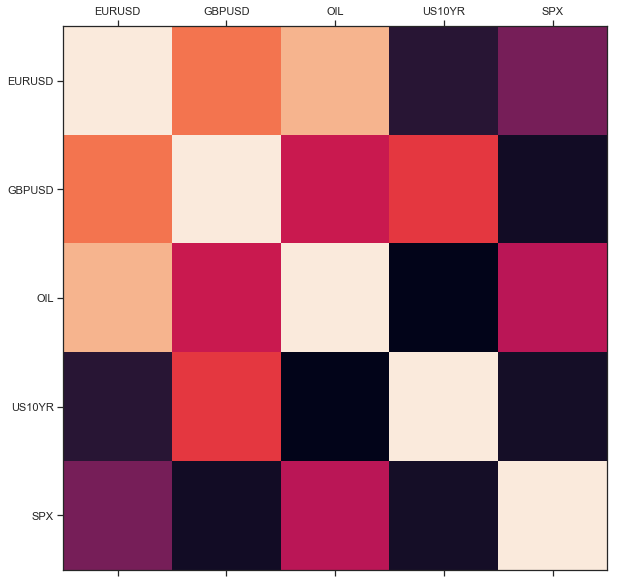

In [108]:
corr=X_std_2.corr()
size=10

fig, ax = plt.subplots(figsize=(size, size))
ax.matshow(corr)
plt.xticks(range(len(corr.columns)), corr.columns)
plt.yticks(range(len(corr.columns)), corr.columns)